In [1]:
import sys
sys.path.append('../src')
from Mapping import *
from PCA import *

import pickle
import matplotlib
import matplotlib.pyplot as plt

In [2]:
V5 = pickle.load(open('../data/V5.p','rb'))
cp_list = V5["cp_list"]
active_L_table_slide_DOA = V5["active_L_table_slide_DOA"]
active_L_table_slide_matrix = V5["active_L_table_slide_matrix"]
active_long_table_slide_DOA = V5["active_long_table_slide_DOA"]
active_long_table_slide_matrix = V5["active_long_table_slide_matrix"]

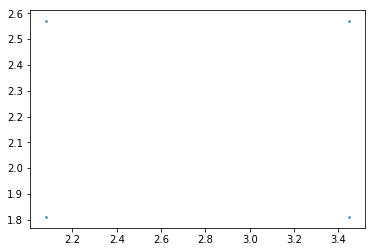

In [3]:
room_x = [i[0] for i in ROOM_COORDINATES[:4]]
room_y = [i[1] for i in ROOM_COORDINATES[:4]]
plt.scatter(room_x, room_y, s=2)

In [4]:
from sklearn.ensemble import RandomForestRegressor

In [5]:
regressor = RandomForestRegressor()
# regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [6]:
# gather control points
control_points = cp_list[:4]
coordinates = [np.array([i[0], i[1]]) for i in ROOM_COORDINATES[:4]]
# consolidate into single arrats
X = np.vstack([c for c in cp_list[:4]])
y = np.vstack([np.full([p.shape[0], len(c)], c) for p, c in zip(control_points, coordinates)])

In [7]:
regressor.fit(X, y)

C:\Users\kazzh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
# plt.scatter(*regressor.predict(X).T)
plt.scatter(regressor.predict(active_L_table_slide_DOA))

TypeError: scatter() missing 1 required positional argument: 'y'

In [9]:
active_L_table_slide_DOA

array([[-0.37575 , -0.413   ,  0.8295  , ...,  0.4     ,  0.41    ,
         0.82    ],
       [-0.374875, -0.413   ,  0.83    , ...,  0.4     ,  0.41    ,
         0.82    ],
       [-0.374   , -0.413   ,  0.83    , ...,  0.4     ,  0.41    ,
         0.82    ],
       ...,
       [-0.34775 , -0.398125,  0.849   , ...,  0.369375,  0.41525 ,
         0.831125],
       [-0.349125, -0.399375,  0.847625, ...,  0.36675 ,  0.4145  ,
         0.83275 ],
       [-0.3515  , -0.399375,  0.8465  , ...,  0.363   ,  0.41675 ,
         0.83325 ]])

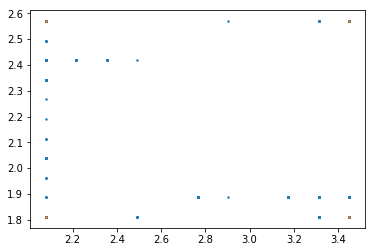

In [21]:
maps = regressor.predict(active_L_table_slide_DOA)
mapX = [x[0] for x in maps]
mapy = [x[1] for x in maps]
plt.scatter(mapX, mapy, s=2)
plt.scatter(room_x, room_y, s=2)

In [14]:
y

array([[2.08, 1.81],
       [2.08, 1.81],
       [2.08, 1.81],
       ...,
       [2.08, 2.57],
       [2.08, 2.57],
       [2.08, 2.57]])